In [100]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textwrap import wrap
import sklearn

import urllib.request
import tarfile
import os

from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import nltk
import librosa
import librosa.display
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# download & extract test dataset from librispeech
if not os.path.exists('./data/LibriSpeech'):
    print('downloading test dataset (300mb)')
    urllib.request.urlretrieve("https://www.openslr.org/resources/12/test-clean.tar.gz", "test.tar.gz")

    print('extracting data')
    file = tarfile.open('test.tar.gz')
    file.extractall('./data')
    file.close()

downloading test dataset (300mb)
extracting data


In [ ]:
# tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
# model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

In [6]:
#     #read the file
#     speech, samplerate = sf.read(input_file)
#     #make it 1-D
#     if len(speech.shape) > 1: 
#         speech = speech[:,0] + speech[:,1]
#     #Resample to 16khz
#     if samplerate != 16000:
#         speech = librosa.resample(speech, samplerate, 16000)

In [14]:
#loading the models
# tokenizer, model = load_wav2vec_960h_model()

#transcript
f = open("./data/LibriSpeech/test-clean/61/70968/61-70968.trans.txt", "r")
lines = str.splitlines(f.read())

63

In [67]:
# store audio, sample rates, trimmed audio

audio_files = []
sample_rates = []
trimmed_files = []

for i in range(len(lines)):
  file_name = './data/LibriSpeech/test-clean/61/70968/61-70968-00' + str(i).zfill(2)
  wav_input = file_name + '.flac'
  y, s = librosa.load(wav_input)
  audio, _ = librosa.effects.trim(y)
  audio_files.append(y)
  sample_rates.append(s)
  trimmed_files.append(audio)

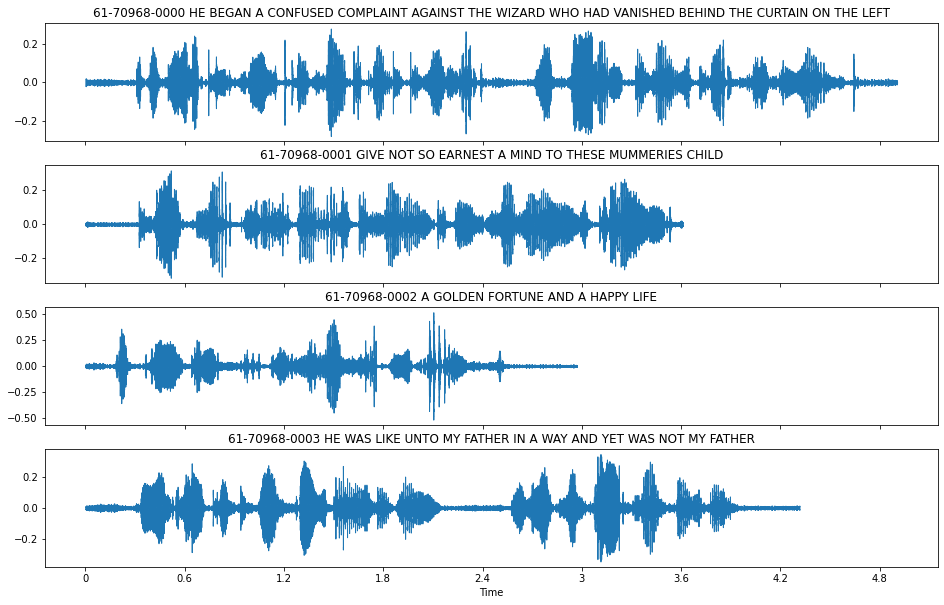

In [43]:
# waveforms

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(16, 10))
for i in range(4):
  librosa.display.waveshow(y = trimmed_files[i], sr = sample_rates[i], ax=ax[i])
  ax[i].set(title=lines[i])
  ax[i].label_outer()

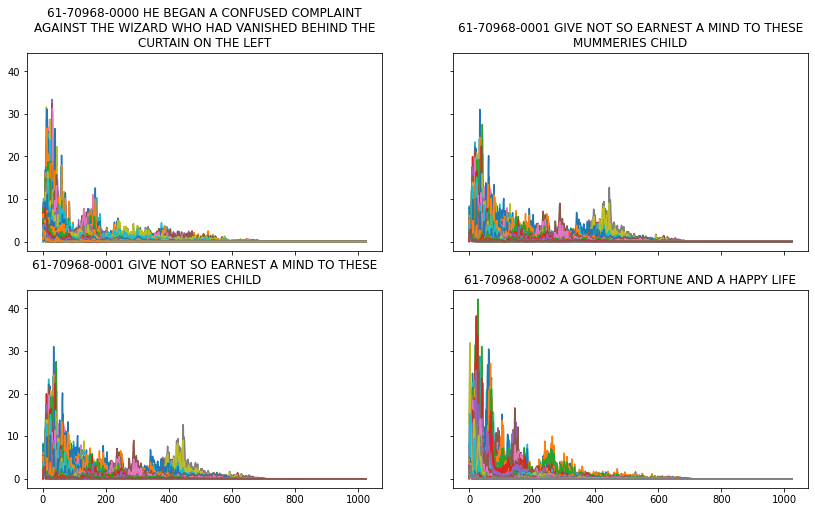

In [61]:
#Fourier Transform

fft = 2048
hl = 512

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    stft = np.abs(librosa.stft(trimmed_files[i+j], n_fft = fft, hop_length = hl))
    ax[i, j].plot(stft);
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()

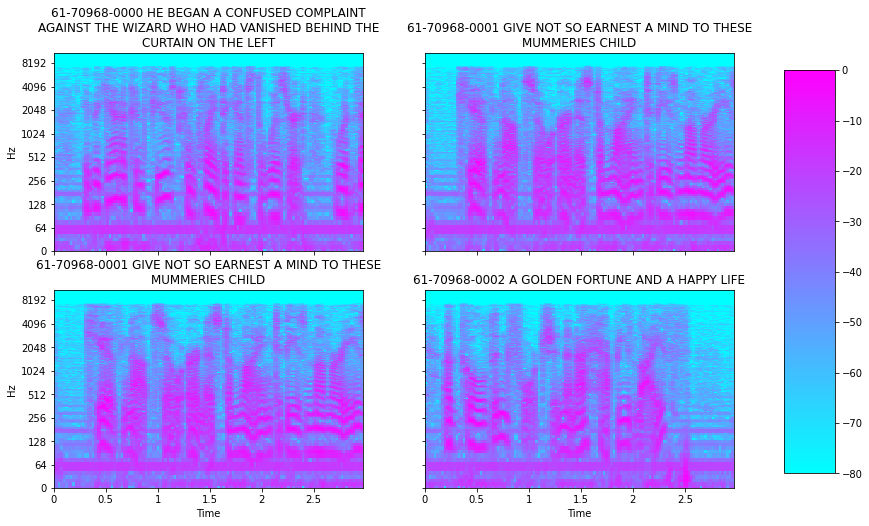

In [89]:
# spectrogram

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    stft = np.abs(librosa.stft(trimmed_files[i+j], n_fft = fft, hop_length = hl))
    decibel = librosa.amplitude_to_db(stft, ref = np.max)
    im = librosa.display.specshow(decibel, sr = sample_rates[i+j], hop_length = hl, x_axis = 'time', y_axis = 'log', cmap = 'cool', ax=ax[i, j])
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

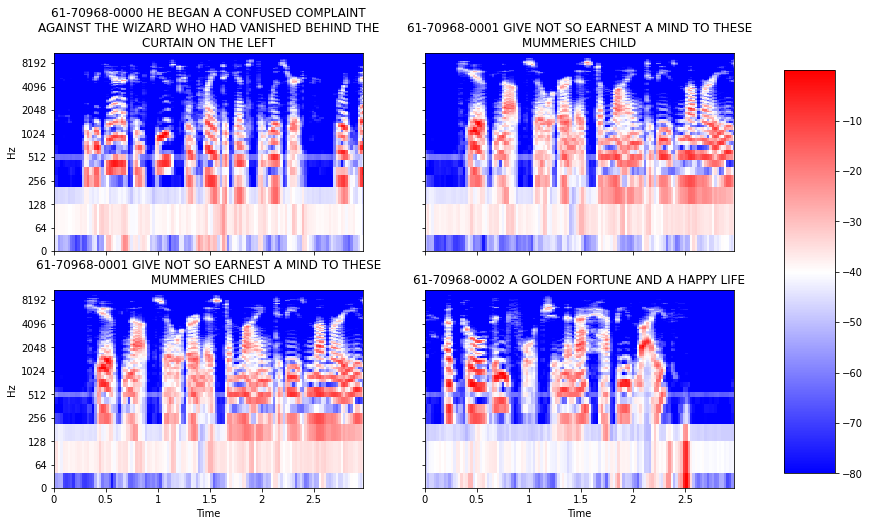

In [83]:
# MEL spectrogram

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    mel = librosa.feature.melspectrogram(audio_files[i+j], sr=sample_rates[0])
    mel_db = librosa.amplitude_to_db(mel, ref=np.max)
    im = librosa.display.specshow(mel_db, sr=sample_rates[i+j], hop_length=hl, x_axis = 'time', y_axis = 'log', cmap = 'bwr', ax = ax[i, j]);
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax);

Text(0, 0.5, 'Count')

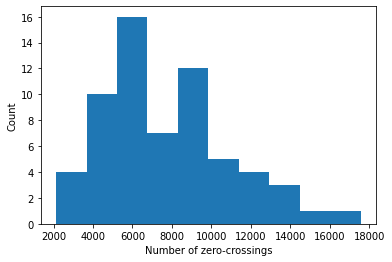

In [95]:
# zero_crossings

zero_cross = [sum(librosa.zero_crossings(trimmed_files[i], pad=False)) for i in range(len(lines))]
plt.hist(zero_cross);
plt.xlabel('Number of zero-crossings')
plt.ylabel('Count')

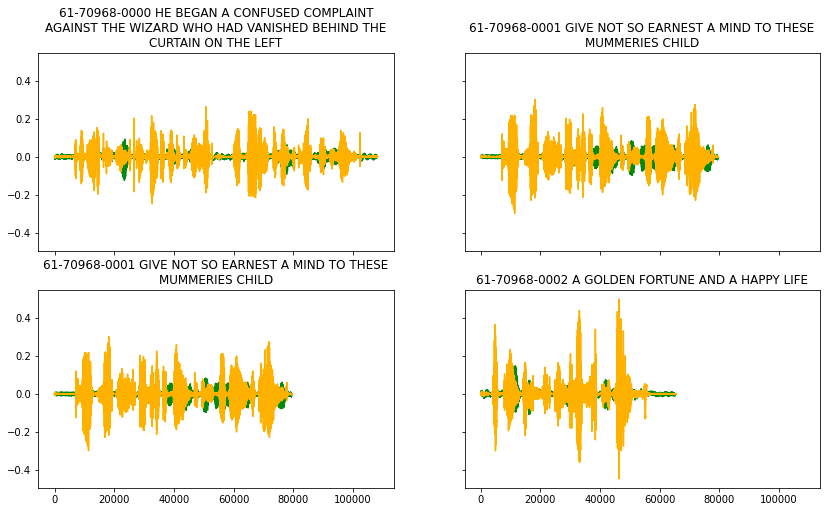

In [96]:
# Median-filtering harmonic percussive source separation (HPSS)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    y_harm, y_perc = librosa.effects.hpss(trimmed_files[i+j])
    ax[i, j].plot(y_harm, color = '#028A0F');
    ax[i, j].plot(y_perc, color = '#FFB100');
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and mig

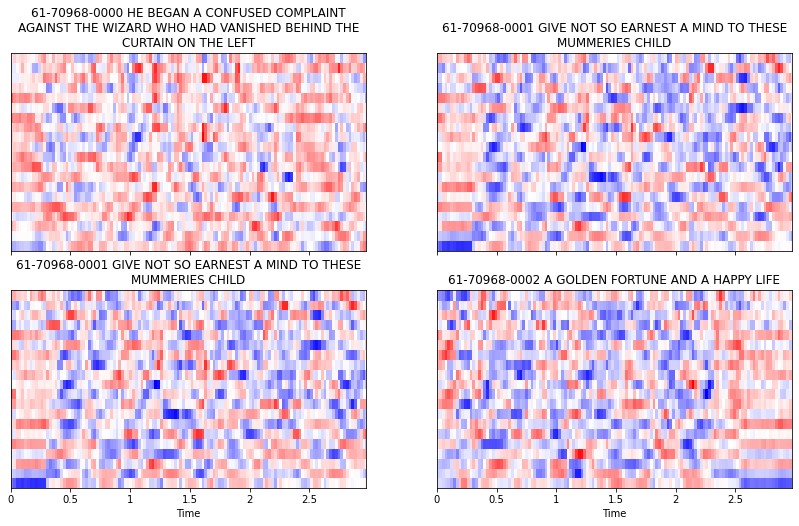

In [103]:
# Mel-frequency cepstral coefficients (MFCCs)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    # mfcc = librosa.feature.mfcc(trimmed_files[i+j], sr=sample_rates[i+j])
    # librosa.display.specshow(mfcc, sr=sample_rates[i+j], x_axis='time', cmap = 'cool', ax=ax[i, j]);
    mfcc = librosa.feature.mfcc(trimmed_files[i+j], sr=sample_rates[i+j])
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    librosa.display.specshow(mfcc, sr=sample_rates[i+j], x_axis='time', cmap = 'bwr', ax=ax[i, j]);
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()

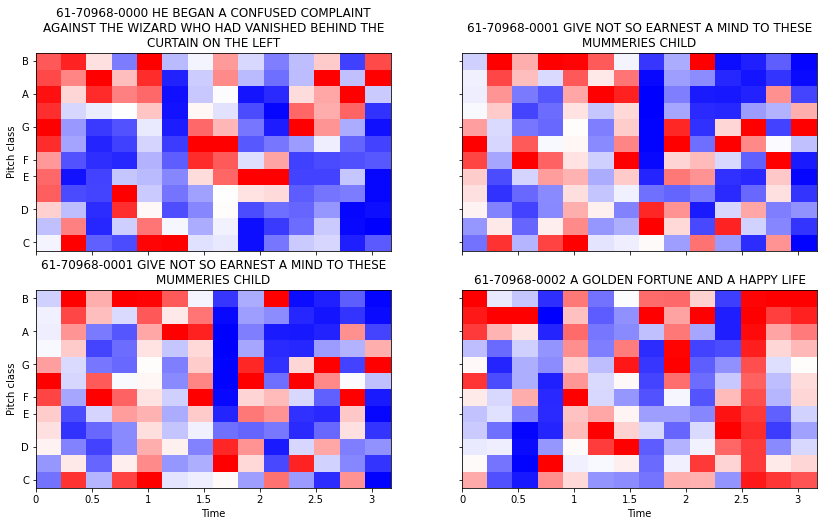

In [99]:
# chromagram
hl = 5000

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(14, 8))
for i in range(2):
  for j in range(2):
    chromagram = librosa.feature.chroma_stft(trimmed_files[i+j], sr=sample_rates[i+j], hop_length=hl)
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hl, cmap='bwr', ax=ax[i, j]);
    ax[i, j].set(title="\n".join(wrap(lines[i+j], 50)))
    ax[i, j].label_outer()